In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime as dt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import backend as K

Using TensorFlow backend.


In [2]:
df_orig = pd.read_json('../datasets/df.json', orient='split')
#print(df_orig.info())
df_orig.head(3)

,date,eth_open,eth_high,eth_low,eth_close,eth_volumefrom,eth_volumeto,btc,xrp,eos,ltc,xlm,xmr,vixcls,twexb,effr
0,2010-07-16,NaN,NaN,NaN,NaN,NaN,NaN,0.04951,NaN,NaN,NaN,NaN,NaN,26.25,103.1938,0.19
1,2010-07-17,NaN,NaN,NaN,NaN,NaN,NaN,0.08584,NaN,NaN,NaN,NaN,NaN,26.25,103.1938,0.19
2,2010-07-18,NaN,NaN,NaN,NaN,NaN,NaN,0.08080,NaN,NaN,NaN,NaN,NaN,26.25,103.1938,0.19


In [3]:
# set df for time series
df = df_orig.copy()

# start at beginning of ethereum
#df = df[df.eth_close.isnull().sum():]
#df.set_index('date', inplace=True)
df.fillna(0, inplace=True)
df.head(3)

,date,eth_open,eth_high,eth_low,eth_close,eth_volumefrom,eth_volumeto,btc,xrp,eos,ltc,xlm,xmr,vixcls,twexb,effr
0,2010-07-16,0.0,0.0,0.0,0.0,0.0,0.0,0.04951,0.0,0.0,0.0,0.0,0.0,26.25,103.1938,0.19
1,2010-07-17,0.0,0.0,0.0,0.0,0.0,0.0,0.08584,0.0,0.0,0.0,0.0,0.0,26.25,103.1938,0.19
2,2010-07-18,0.0,0.0,0.0,0.0,0.0,0.0,0.08080,0.0,0.0,0.0,0.0,0.0,26.25,103.1938,0.19


In [4]:
X = df.iloc[1:, 8:]
#X.drop(['eth_volumefrom', 'eth_volumeto'], axis=1, inplace=True)
#X = df.loc[:, ~df.columns.isin(['eth_close', 'date'])][1:]
y = df.shift(1).eth_close[1:]

X_train = np.array(X.iloc[:-8,:])
X_test = np.array(X.iloc[-8:,:])
y_train = np.array(y.iloc[:-8])
y_test = np.array(y.iloc[-8:])

In [5]:
def r2(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

def rmse(y_true, y_pred):
    rmse = K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))
    return rmse

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r2, rmse])

model.fit(X_train,
          y_train,
          epochs=100,
          validation_data=(X_test, y_test))

Train on 2972 samples, validate on 8 samples
Epoch 1/100
2972/2972 [==============================] - 1s 224us/step - loss: 32618.4783 - r2: 0.0622 - rmse: 84.3266 - val_loss: 575.3517 - val_r2: -0.9815 - val_rmse: 19.9477
Epoch 2/100
2972/2972 [==============================] - 0s 48us/step - loss: 12273.5292 - r2: 0.6613 - rmse: 55.9019 - val_loss: 3370.3293 - val_r2: -10.6076 - val_rmse: 56.1366
Epoch 3/100
2972/2972 [==============================] - 0s 47us/step - loss: 8931.6358 - r2: -0.2443 - rmse: 40.8927 - val_loss: 8040.3057 - val_r2: -26.6913 - val_rmse: 88.4227
Epoch 4/100
2972/2972 [==============================] - 0s 46us/step - loss: 7918.3222 - r2: 0.7487 - rmse: 34.8415 - val_loss: 10396.3643 - val_r2: -34.8057 - val_rmse: 100.8653
Epoch 5/100
2972/2972 [==============================] - 0s 43us/step - loss: 7098.2653 - r2: 0.8231 - rmse: 31.5564 - val_loss: 9604.0898 - val_r2: -32.0771 - val_rmse: 96.8602
Epoch 6/100
2972/2972 [==============================] - 0s 5

Epoch 47/100
2972/2972 [==============================] - 0s 41us/step - loss: 3863.1056 - r2: 0.9075 - rmse: 20.9644 - val_loss: 1306.3704 - val_r2: -3.4992 - val_rmse: 32.7618
Epoch 48/100
2972/2972 [==============================] - 0s 40us/step - loss: 4056.0484 - r2: 0.8903 - rmse: 21.5555 - val_loss: 2443.6816 - val_r2: -7.4162 - val_rmse: 47.0198
Epoch 49/100
2972/2972 [==============================] - 0s 39us/step - loss: 4401.2318 - r2: 0.8942 - rmse: 22.4861 - val_loss: 1397.4800 - val_r2: -3.8130 - val_rmse: 34.0931
Epoch 50/100
2972/2972 [==============================] - 0s 39us/step - loss: 3824.7936 - r2: 0.9107 - rmse: 21.3131 - val_loss: 1064.3638 - val_r2: -2.6657 - val_rmse: 28.7945
Epoch 51/100
2972/2972 [==============================] - 0s 39us/step - loss: 3507.7979 - r2: 0.9104 - rmse: 20.4642 - val_loss: 301.1042 - val_r2: -0.0370 - val_rmse: 15.0165
Epoch 52/100
2972/2972 [==============================] - 0s 50us/step - loss: 3863.2865 - r2: 0.9024 - rmse: 2

2972/2972 [==============================] - 0s 43us/step - loss: 3202.1922 - r2: 0.9261 - rmse: 19.5489 - val_loss: 840.5002 - val_r2: -1.8947 - val_rmse: 24.4159
Epoch 94/100
2972/2972 [==============================] - 0s 43us/step - loss: 2754.2150 - r2: 0.9172 - rmse: 18.9647 - val_loss: 462.2146 - val_r2: -0.5919 - val_rmse: 17.3309
Epoch 95/100
2972/2972 [==============================] - 0s 41us/step - loss: 3082.2898 - r2: 0.9121 - rmse: 20.0252 - val_loss: 670.0822 - val_r2: -1.3078 - val_rmse: 21.0165
Epoch 96/100
2972/2972 [==============================] - 0s 42us/step - loss: 2731.8686 - r2: 0.9316 - rmse: 19.1908 - val_loss: 248.0147 - val_r2: 0.1458 - val_rmse: 13.6354
Epoch 97/100
2972/2972 [==============================] - 0s 41us/step - loss: 3410.1050 - r2: 0.9108 - rmse: 20.5870 - val_loss: 287.6132 - val_r2: 0.0094 - val_rmse: 13.5273
Epoch 98/100
2972/2972 [==============================] - 0s 42us/step - loss: 3328.4089 - r2: 0.9188 - rmse: 20.5963 - val_loss: 

## LSTM RNN

In [18]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM

def ts_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return(pd.Series(diff))

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1,1))
    train = train.reshape(train.shape[0], train.shape[1])
    test = test.reshape(test.shape[0], test.shape[1])
    train_scaled = scaler.fit_transform(train)
    test_scaled = scaler.fit_transform(test)
    return scaler, train_scaled, test_scaled

def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(
        neurons,
        batch_input_shape=(batch_size, X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [31]:
# set time series
ts = df_orig[['date','eth_close']].copy()
ts = ts[ts.eth_close.isnull().sum():]
ts.set_index('date', inplace=True, drop=True)
ts.head(3)

,eth_close
date,
2015-08-06,3.0
2015-08-07,1.2
2015-08-08,1.2


In [32]:
ts = ts.values

In [33]:
# difference for stationarity
ts_diff = difference(ts, 1)

In [34]:
# transform for supervised learning
ts_sup = ts_to_supervised(ts_diff, 1)
ts_sup = ts_sup.values

In [35]:
# set train/test
train = ts_sup[:-8]
test = ts_sup[-8:]

In [36]:
# scale
scaler, train_scaled, test_scaled = scale(train, test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
# fit_lstm
model = fit_lstm(train_scaled, None, 1000, 4)

In [38]:
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
model.predict(train_reshaped, batch_size=1)

array([[0.19961274],
       [0.19904563],
       [0.19961274],
       ...,
       [0.19950593],
       [0.19768995],
       [0.1984297 ]], dtype=float32)

In [39]:
predictions = list()
for i in range(len(test_scaled)):
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(model, 1, X)
    yhat = invert_scale(scaler, X, yhat)
    yhat = inverse_difference(ts, yhat, len(test_scaled) + 1 - i)
    predictions.append(yhat)
    expected = ts[len(train) + i + 1]
    print('predicted: {}, expected: {}'.format(yhat, expected))

predicted: [232.72745578], expected: [229.52]
predicted: [236.62326865], expected: [215.14]
predicted: [221.87728313], expected: [196.77]
predicted: [203.36496816], expected: [195.99]
predicted: [203.06275999], expected: [197.14]
predicted: [204.24188099], expected: [185.15]
predicted: [191.96304064], expected: [183.03]
predicted: [190.07990655], expected: [206.03]


In [41]:
from sklearn.metrics import mean_squared_error

def r2_lstm(observed, predicted):
    ss_resid = sum((observed - predicted) ** 2)
    ss_tot = sum((observed - np.mean(predicted)) ** 2)
    r2 = 1 - (ss_resid / ss_tot)
    return r2

def rmse_lstm(observed, predicted):
    rmse = np.sqrt(mean_squared_error(observed, predicted))
    return rmse

print('test r2: {}'.format(r2_lstm(ts[-8:], predictions)))
print('test rmse: {}'.format(rmse_lstm(ts[-8:], predictions)))

test r2: [0.2046983]
test rmse: 15.371922976202487


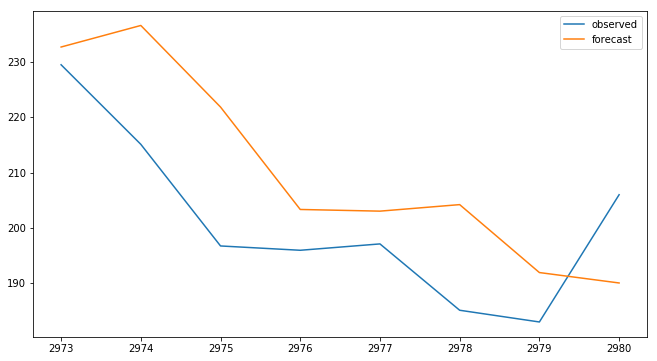

In [43]:
plt.figure(figsize=(11,6))
plt.plot(df[-8:].index,
         ts[-8:],
         label='observed')
plt.plot(df[-8:].index,
         predictions,
         label='forecast')
plt.legend()
plt.show()